In [1]:
#Necessary Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read and load data

In [4]:
df = pd.read_csv('/content/sample_data/Insurance Data.csv')
df

,Index,Age,Gender,BMI,Children,Smoker,Region,InsuranceCharges
0,0,19,Female,27.900,0,Yes,southwest,16884.92
1,1,18,Male,33.770,1,No,southeast,1725.55
2,2,28,Male,33.000,3,No,southeast,4449.46
3,3,33,Male,22.705,0,No,northwest,21984.47
4,4,32,Male,28.880,0,No,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,1333,50,Male,30.970,3,No,northwest,10600.55
1334,1334,18,Female,31.920,0,No,northeast,2205.98
1335,1335,18,Female,36.850,0,No,southeast,1629.83
1336,1336,21,Female,25.800,0,No,southwest,2007.95


In [5]:
#Data Preprocessing

In [6]:
#General Information of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             1338 non-null   int64  
 1   Age               1338 non-null   int64  
 2   Gender            1338 non-null   object 
 3   BMI               1338 non-null   float64
 4   Children          1338 non-null   int64  
 5   Smoker            1338 non-null   object 
 6   Region            1338 non-null   object 
 7   InsuranceCharges  1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [8]:
#There is no need of column Index in our analysis, so we'll remove it.

In [9]:
df = df.drop(columns='Index',axis=1)

In [10]:
#Checking for null values

In [11]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Children            0
Smoker              0
Region              0
InsuranceCharges    0
dtype: int64

In [12]:
# There are no null values present in the data.

In [13]:
#Checking for Duplicate values

In [14]:
df.duplicated().sum()

1

In [15]:
# There are no Duplicate values present in the data.

In [16]:
#Checking for Outliers

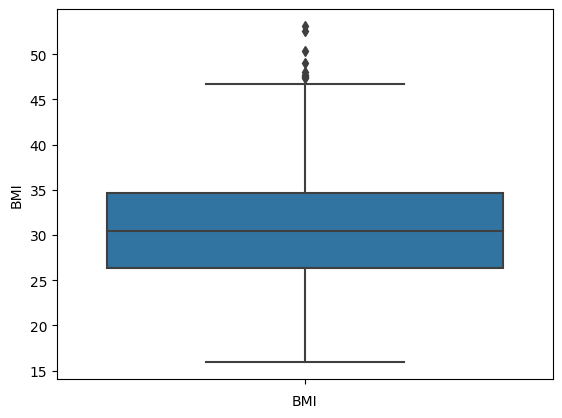

In [17]:
fig, ax = plt.subplots()

sns.boxplot(data=df, y='BMI', ax=ax)
ax.set_xlabel('BMI')

plt.show()

In [18]:
# We will not do outlier treatment for BMI, we wish to maintain some realness in the data. Outlier observations are just 20 anyway, thus won’t hurt our model.

In [19]:
#Basic Discription of Data

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.00,27.00000,39.00,51.00000,64.00
BMI,1338.0,30.663397,6.098187,15.96,26.29625,30.40,34.69375,53.13
Children,1338.0,1.094918,1.205493,0.00,0.00000,1.00,2.00000,5.00
InsuranceCharges,1338.0,13270.422414,12110.011240,1121.87,4740.28750,9382.03,16639.91500,63770.43


In [21]:
#Exploratory Data Analysis

In [22]:
#Age distribution histogram

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

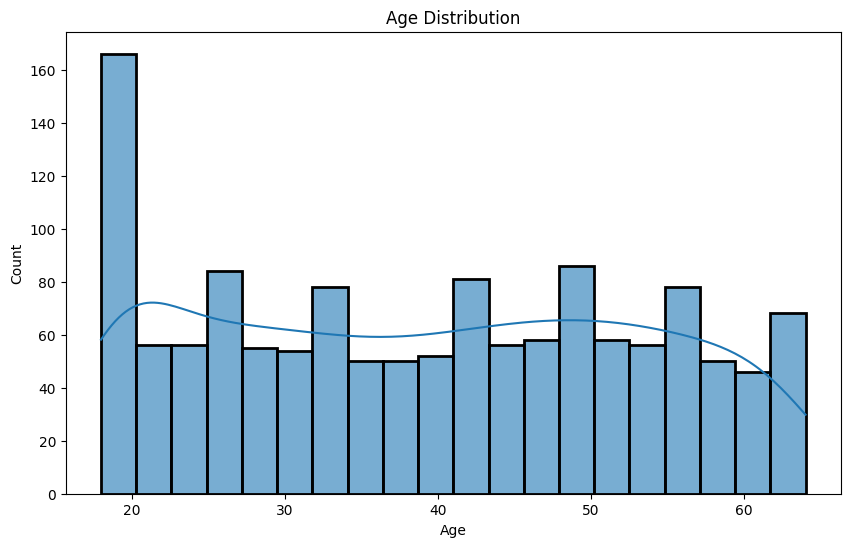

In [23]:
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
sns.histplot(df,x='Age',kde=True,alpha=0.6,bins=20,linewidth=2)

In [24]:
#It's obvious that the people between age 18-20 are the biggest category in this dataset.

In [25]:
#Gender wise Charges amount distribution histogram

<Axes: title={'center': 'Charge Amount Distribution'}, xlabel='InsuranceCharges', ylabel='Count'>

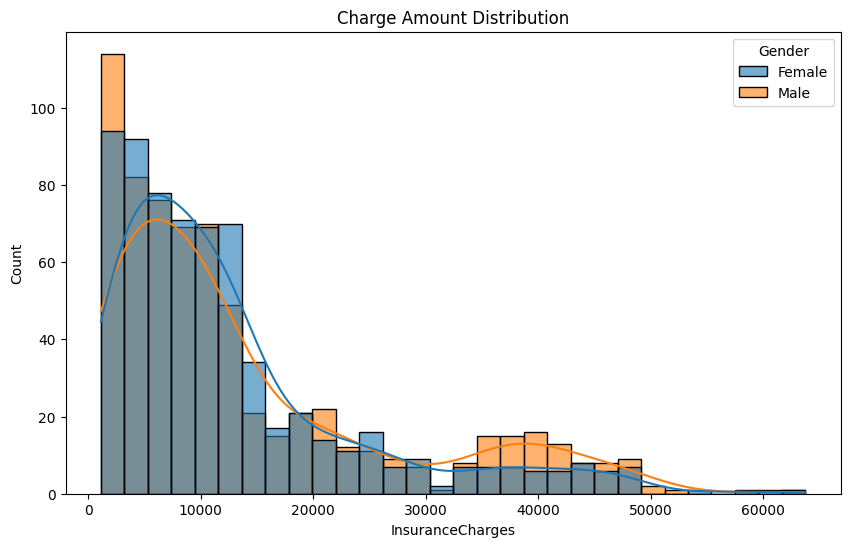

In [26]:
plt.figure(figsize=(10,6))
plt.title('Charge Amount Distribution')
sns.histplot(df,x='InsuranceCharges',hue="Gender",kde=True,alpha=0.6,linewidth=1)

In [27]:
#We can see that the charge amount for males and females is equal, but there are more no. of males than females paying more than Rs.3200

In [28]:
#Average BMI per age

<Axes: title={'center': 'Average BMI per Age '}, xlabel='Age'>

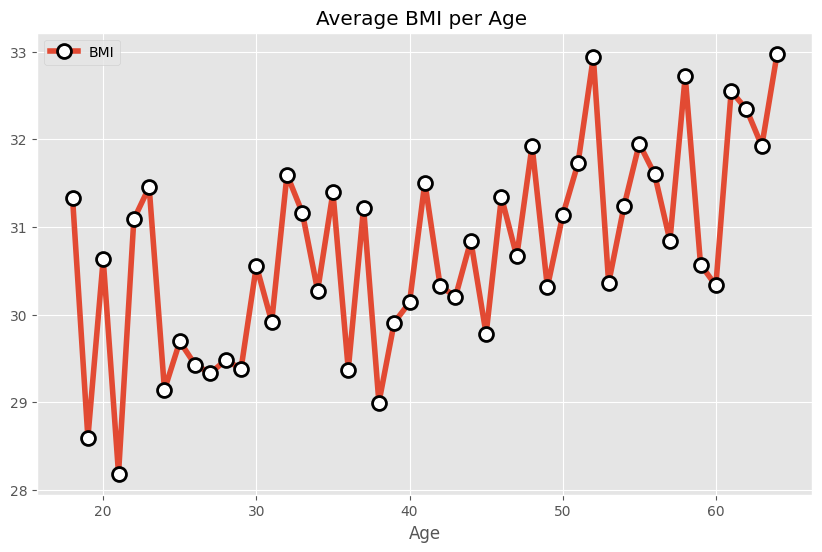

In [29]:
plt.style.use('ggplot')
agebmi=pd.pivot_table(df,index='Age',values='BMI',aggfunc='mean')
agebmi.plot(kind='line',figsize=(10,6),title='Average BMI per Age ',marker="o",linewidth=4,markersize=10,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)

In [30]:
#As we can see, with time, the average BMI score starts getting higher to unhealthier ranges.

In [31]:
#Average BMI for various Number of Children Values

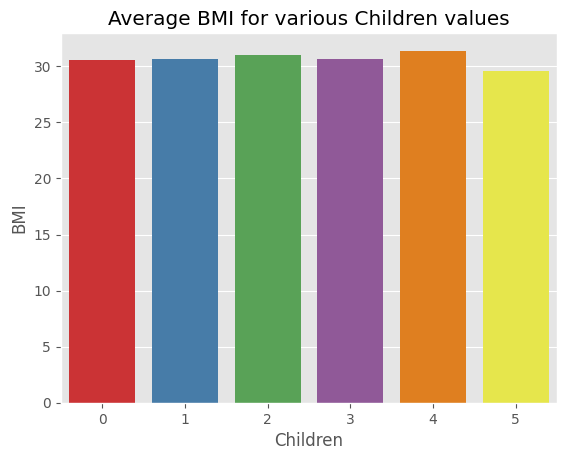

In [32]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='Children', y='BMI', ax=ax, palette='Set1', ci=None)

ax.set_title("Average BMI for various Children values")
ax.set_xlabel("Children")
ax.set_ylabel("BMI")
plt.show()

In [33]:
#Average BMI for various number of children values is nearly same.

In [34]:
#Average BMI for Smoker and Non-Smoker

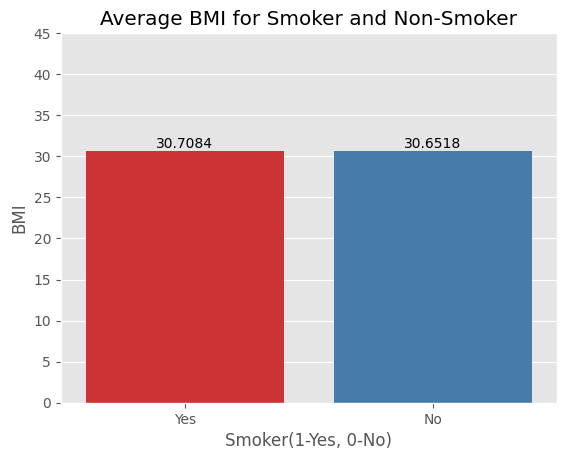

In [35]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='Smoker', y='BMI', ax=ax, palette='Set1', ci=None)

ax.set_title("Average BMI for Smoker and Non-Smoker")
ax.set_xlabel("Smoker(1-Yes, 0-No)")
ax.set_ylabel("BMI")
ax.bar_label(ax.containers[0])
ax.set_ylim((0, 45))
plt.show()

In [36]:
#Average BMI value for Smoker and Non-Smoker is same.

In [37]:
#Average charge amount per number of children

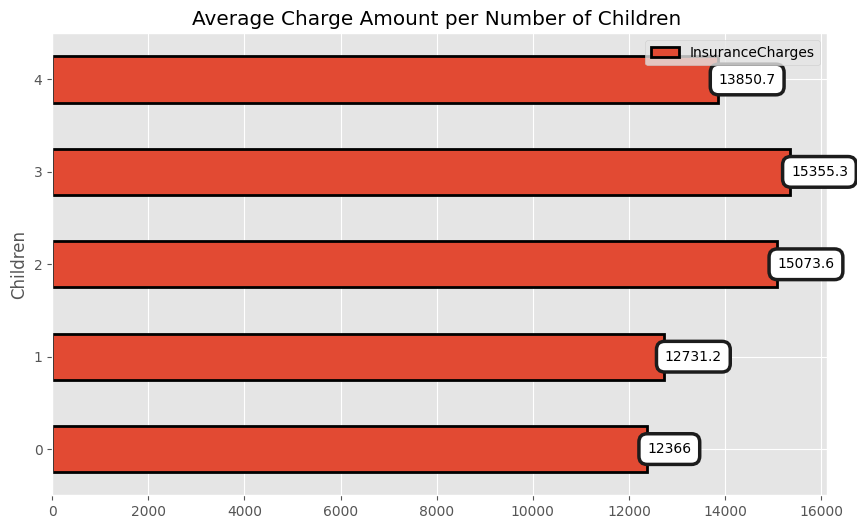

In [38]:
plt.style.use('ggplot')
child=pd.pivot_table(df,index='Children',values='InsuranceCharges')
child=child.sort_values(by='Children',ascending=True).head()
p2=child.plot(kind='barh',figsize=(10,6),title='Average Charge Amount per Number of Children ',edgecolor = 'black',lw=2)
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

In [39]:
#In general, charging amount will increase when the number of children increase.

In [40]:
#Average No. of Children for Different Regions

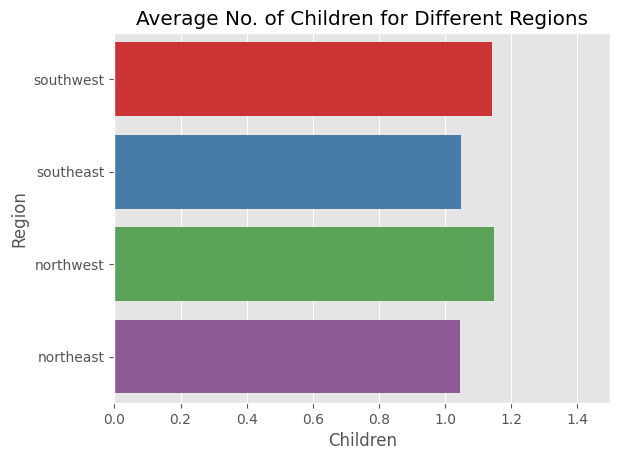

In [41]:
fig, ax = plt.subplots()
sns.barplot(data=df, y='Region', x='Children', ax=ax, palette='Set1', ci=None)
ax.set_title("Average No. of Children for Different Regions")
ax.set_xlim((0, 1.5))
plt.show()

In [42]:
#Average no. of children for different regions is same.

In [43]:
#Charges amount distribution per smoker histogram

<Axes: title={'center': 'Charge Amount Distribution per Smoker'}, xlabel='InsuranceCharges', ylabel='Count'>

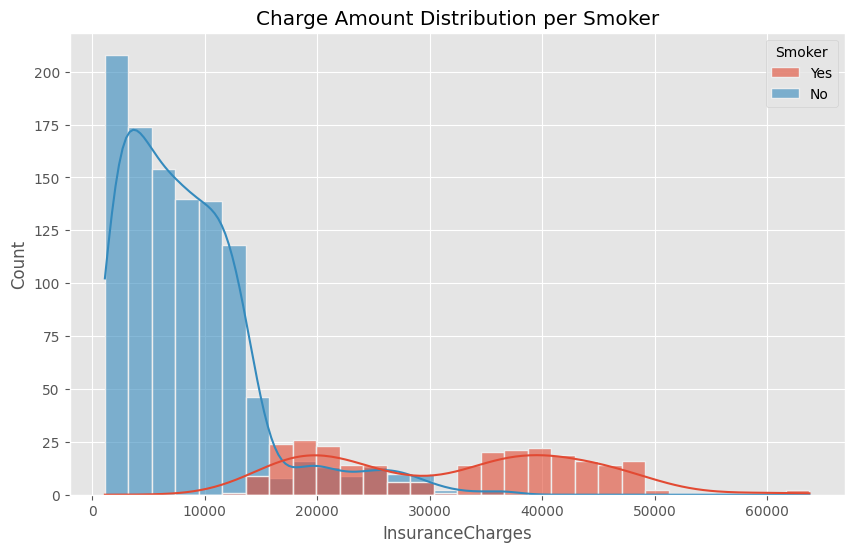

In [44]:
plt.figure(figsize=(10,6))
plt.title('Charge Amount Distribution per Smoker')
sns.histplot(df,x='InsuranceCharges',hue="Smoker",kde=True,alpha=0.6,linewidth=1)

In [45]:
#From the histogram above, we can say that smoker people are getting charged more than non-smokers. They always start with $10000 as initial amount.

In [46]:
#Checking unique regions in the dataset

In [47]:
df.Region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [48]:
#Average charge amount per region

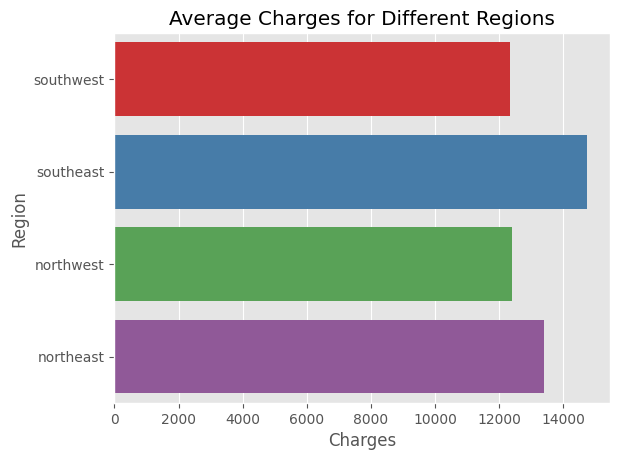

In [49]:
fig, ax = plt.subplots()

sns.barplot(data=df, y='Region', x='InsuranceCharges', ax=ax, palette='Set1', ci=None)

ax.set_title("Average Charges for Different Regions")
ax.set_xlabel("Charges")

plt.show()

In [50]:
#Southheast region has the highest average charge amount per region. In general, there is a small deffirence between regions in term of charging amount.

In [51]:
#Total charges amount per sex pie chart

array([<Axes: ylabel='InsuranceCharges'>], dtype=object)

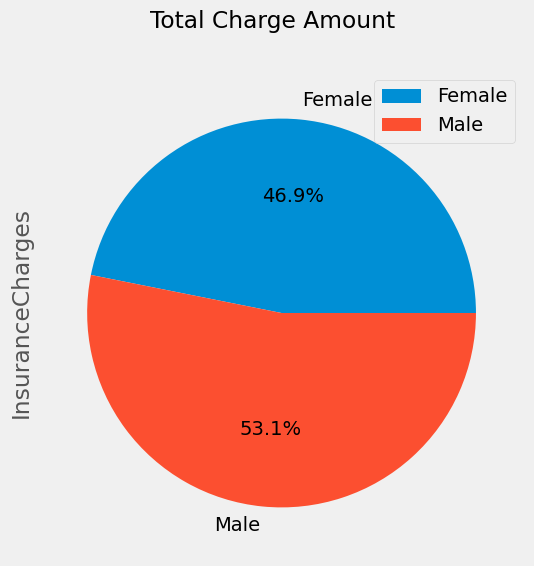

In [52]:
plt.style.use('fivethirtyeight')
sex=pd.pivot_table(df,index='Gender',values='InsuranceCharges',aggfunc='sum')
sex.plot(kind='pie',figsize=(6,6),subplots=True,autopct='%1.1f%%',title='Total Charge Amount')

In [53]:
#In total, Males are getting charged more than females. I was expecting a huge gap but it's kinda small.

In [54]:
# Feature Engineering

In [55]:
#Continous Variables

In [56]:
#Is there a relation between age and charge amount?

<Axes: xlabel='Age', ylabel='InsuranceCharges'>

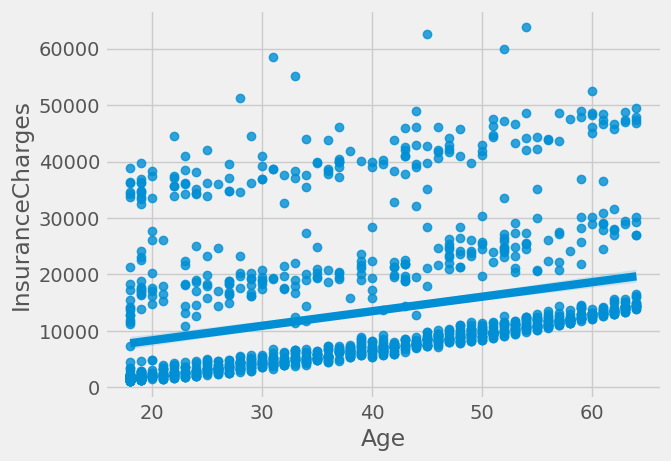

In [57]:
sns.regplot(x="Age", y="InsuranceCharges", data=df)

In [58]:
#The data points are scattered in increasing manner with age. So, there is strong correlation between Age and Insurance Charges.

In [59]:
#Is there a relation between BMI and charge amount?

<Axes: xlabel='BMI', ylabel='InsuranceCharges'>

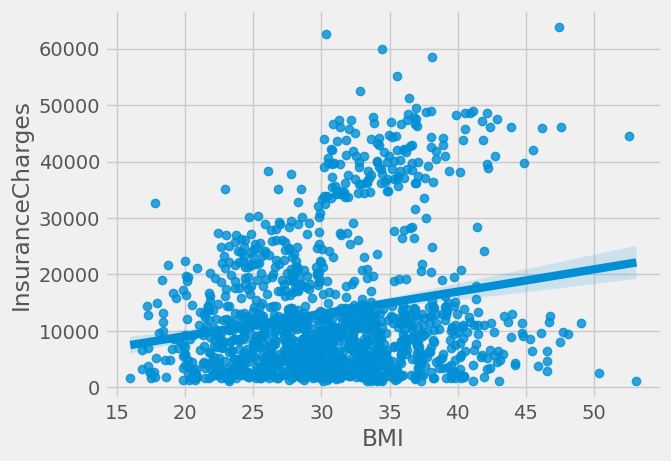

In [60]:
sns.regplot(x="BMI", y="InsuranceCharges", data=df)

In [61]:
#The data points shows somewhat increasing trend with BMI. So, there is considerable correlation between BMI and Insurance Charges.

In [62]:
#Categorical Variables

<Axes: xlabel='Gender', ylabel='InsuranceCharges'>

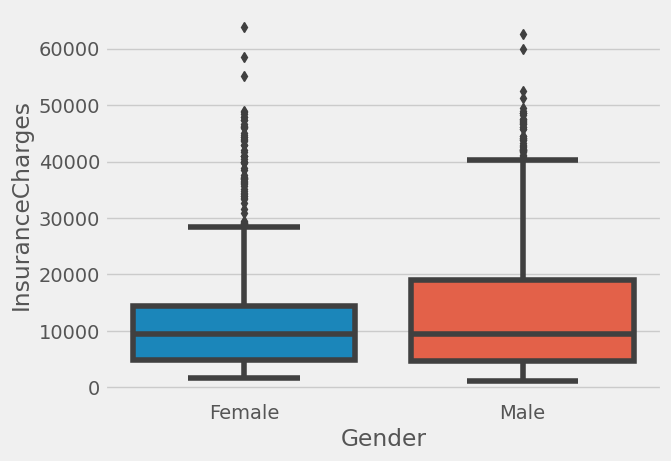

In [63]:
sns.boxplot(x="Gender", y="InsuranceCharges", data=df)

<Axes: xlabel='Children', ylabel='InsuranceCharges'>

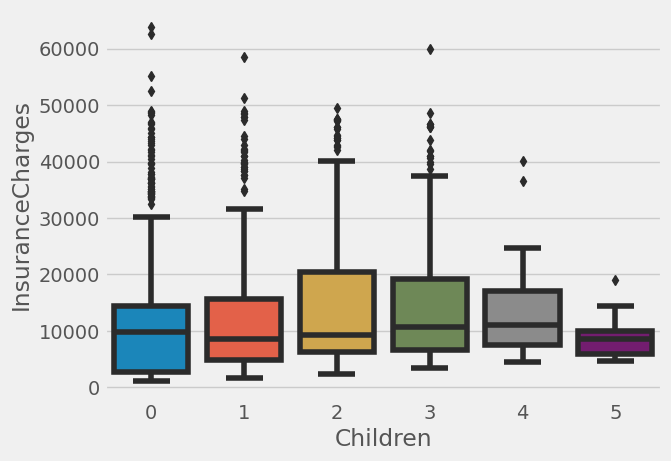

In [64]:
sns.boxplot(x="Children", y="InsuranceCharges", data=df)

<Axes: xlabel='Smoker', ylabel='InsuranceCharges'>

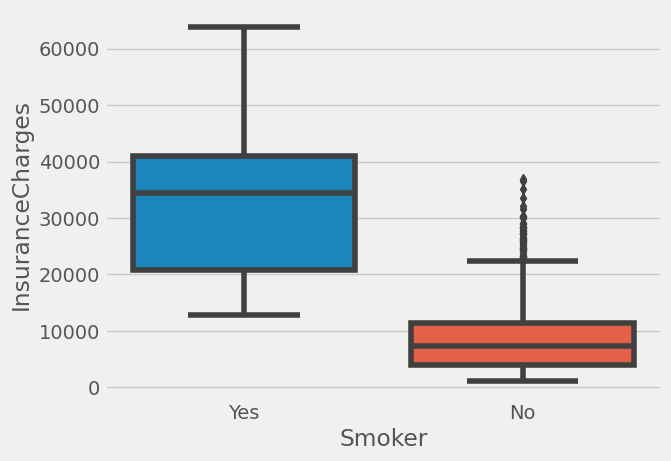

In [65]:
sns.boxplot(x="Smoker", y="InsuranceCharges", data=df)

In [66]:
#The classes of feature for which the distribution of Insurance Charges is distinct enough, such feature can be potential good predictor of Insurance Charges.

<Axes: xlabel='Region', ylabel='InsuranceCharges'>

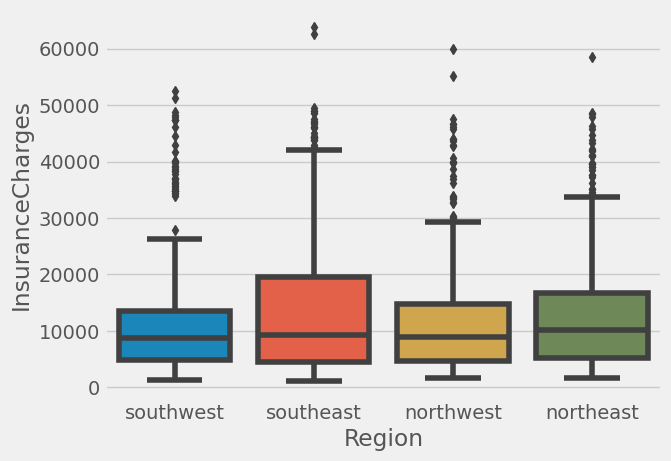

In [67]:
sns.boxplot(x="Region", y="InsuranceCharges", data=df)

In [68]:
#The classes of feature for which the distribution of Insurance Charges is somewhat distinct, such feature could be potential predictor of Insurance Charges.

In [69]:
#From above Regression Plots and Box Plots we can conclude that, the variables ‘Age’, ‘BMI’, ‘Children’ and ‘Smoker’ can be good predictors for Insurance Charges.

In [70]:
#Statistical Testing

In [71]:
#Shapiro-Wilk Test for Normality

In [72]:
import scipy as scipy
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [73]:
'''stats.shapiro(df)'''

'stats.shapiro(df)'

In [74]:
#Data is non-normal.

In [75]:
#Chi-Square Test

In [76]:
#Between Smoker and Gender

In [77]:
df_table = pd.crosstab(df["Gender"],df["Smoker"])
print(df_table)

Smoker   No  Yes
Gender          
Female  547  115
Male    517  159


In [78]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:2,0])
no_columns = len(df_table.iloc[0,0:2])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 7.765921028604451
Degrees of Freedom : 1
p-value : 0.005324114164320548


In [79]:
if p_value < alpha:
  print('Reject H0, attribute Smoker and Gender are dependent.')
else:
  print('Accept H0, attribute Smoker and Gender are independent.')

Reject H0, attribute Smoker and Gender are dependent.


In [80]:
#Between Smoker and Children

In [81]:
df_table = pd.crosstab(df["Children"],df["Smoker"])
print(df_table)

Smoker     No  Yes
Children          
0         459  115
1         263   61
2         185   55
3         118   39
4          22    3
5          17    1


In [82]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:5,0])
no_columns = len(df_table.iloc[0,0:2])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 6.88771990494763
Degrees of Freedom : 4
p-value : 0.14194202277971024


In [83]:
if p_value < alpha:
  print('Reject H0, attribute Smoker and Children are dependent.')
else:
  print('Accept H0, attribute Smoker and Children are independent.')

Accept H0, attribute Smoker and Children are independent.


In [84]:
#Between Smoker and Region

In [85]:
df_table = pd.crosstab(df["Region"],df["Smoker"])
print(df_table)

Smoker      No  Yes
Region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


In [86]:
Observed_Values = df_table.values
val = stats.chi2_contingency(df_table)
Expected_Values = val[3]
no_rows = len(df_table.iloc[0:4,0])
no_columns = len(df_table.iloc[0,0:2])
dof = (no_rows-1)*(no_columns-1)
alpha = 0.05
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]
p_value = 1-chi2.cdf(x=chi_square_statistic,df=dof)
print("Chi-2 Statistic :",chi_square_statistic)
print("Degrees of Freedom :",dof)
print("p-value :",p_value)

Chi-2 Statistic : 7.34347776140707
Degrees of Freedom : 3
p-value : 0.06171954839170546


In [87]:
if p_value < alpha:
  print('Reject H0, attribute Smoker and Region are dependent.')
else:
  print('Accept H0, attribute Smoker and Region are independent.')

Accept H0, attribute Smoker and Region are independent.


In [88]:
# Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [89]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,InsuranceCharges
0,19,0,27.900,0,1,3,16884.92
1,18,1,33.770,1,0,2,1725.55
2,28,1,33.000,3,0,2,4449.46
3,33,1,22.705,0,0,1,21984.47
4,32,1,28.880,0,0,1,3866.86


In [90]:
#Data correlation

<Axes: >

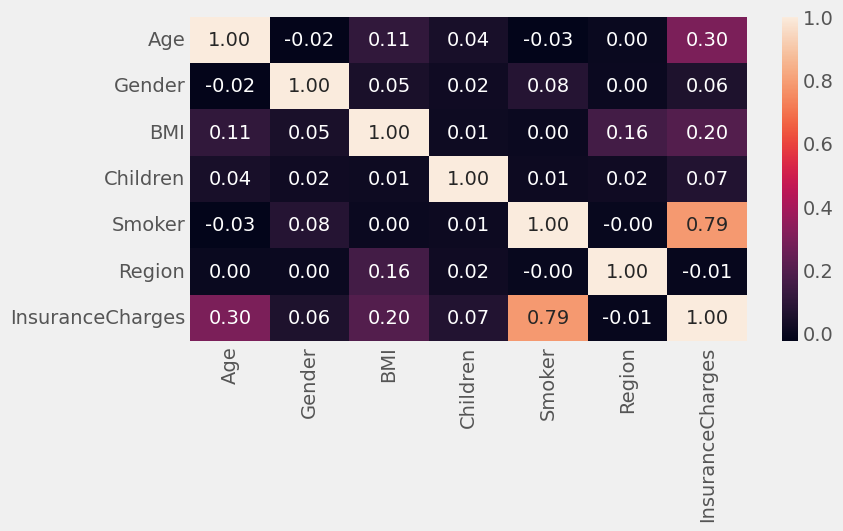

In [91]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,fmt= '.2f')

In [92]:
df = df.drop(['Gender','Region'], axis =1)
df.head()

,Age,BMI,Children,Smoker,InsuranceCharges
0,19,27.900,0,1,16884.92
1,18,33.770,1,0,1725.55
2,28,33.000,3,0,4449.46
3,33,22.705,0,0,21984.47
4,32,28.880,0,0,3866.86


In [93]:
#Feature Scaling

In [94]:
#Plotting the features using Boxen Plot

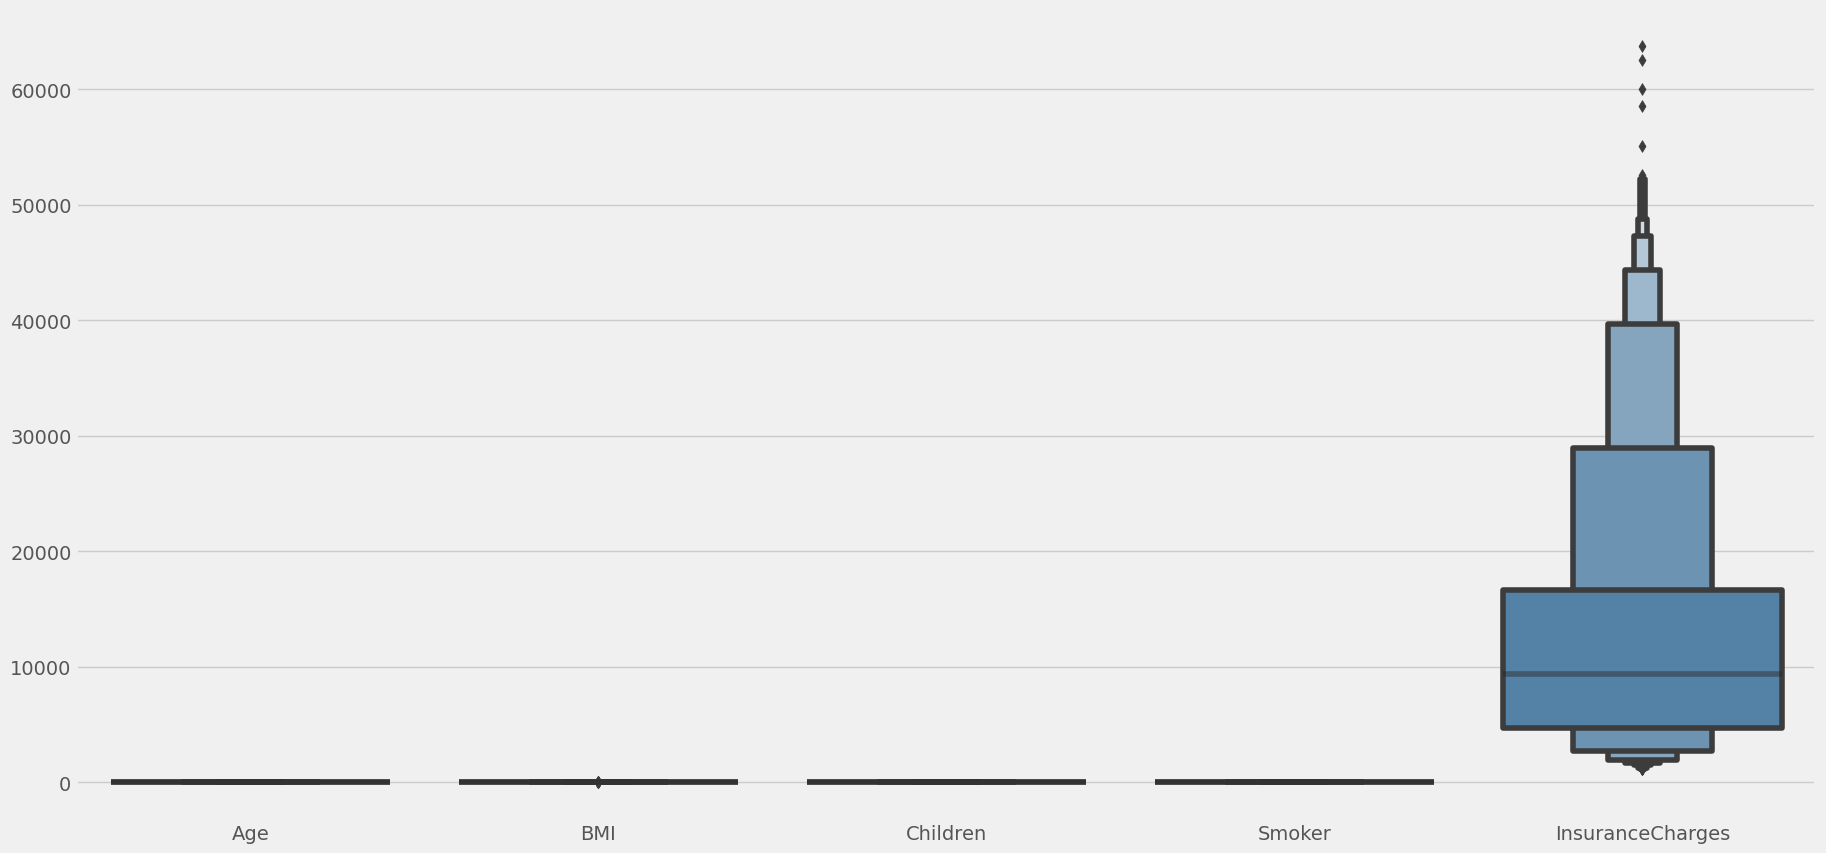

In [95]:
colors=["#483D8B","#4682B4", "#87CEFA"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colors)
plt.show()

In [96]:
#The above plot shows the range of features in the data. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In [97]:
#Scaling the Data

In [98]:
# Defining independent and dependent variables
X=df.drop(["InsuranceCharges"],axis=1)
y=df["InsuranceCharges"]

In [99]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [100]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled

,Age,BMI,Children,Smoker
0,-1.438764,-0.453320,-0.908614,1.970587
1,-1.509965,0.509621,-0.078767,-0.507463
2,-0.797954,0.383307,1.580926,-0.507463
3,-0.441948,-1.305531,-0.908614,-0.507463
4,-0.513149,-0.292556,-0.908614,-0.507463
...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.507463
1334,-1.509965,0.206139,-0.908614,-0.507463
1335,-1.509965,1.014878,-0.908614,-0.507463
1336,-1.296362,-0.797813,-0.908614,-0.507463


In [101]:
#Plotting the scaled features

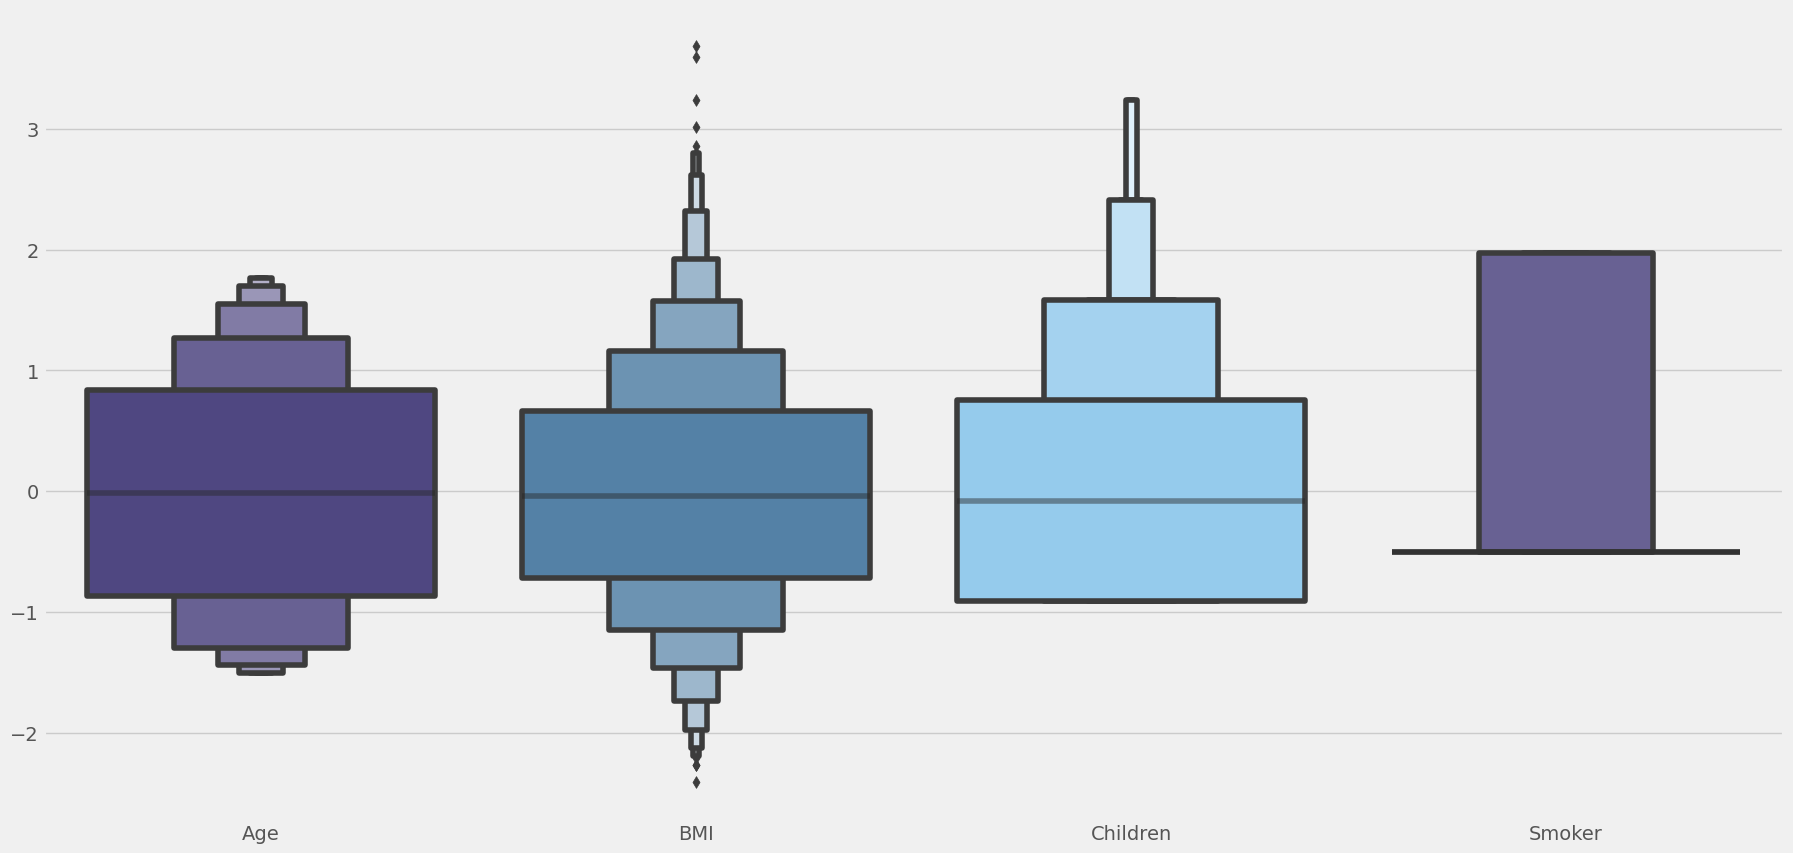

In [102]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.show()

In [103]:
#The plot clearly indicates that, now all the features are in same range since we have scaled the data.

In [104]:
#Model Development

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [106]:
#Spliting the data into Train data and Test data
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.15,random_state=42)

In [107]:
X_train.shape,y_train.shape

((1137, 4), (1137,))

In [108]:
X_test.shape,y_test.shape

((201, 4), (201,))

In [109]:
# table of all models

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']

R_squared = []

for i in models:
    i.fit(X_train, y_train)
    y_predict = i.predict(X_test)
    R_squared.append(i.score(X_train,y_train))

model_comparison = pd.DataFrame({'Model': model_names, 'R-squared': R_squared})
model_comparison.sort_values(by='R-squared', ascending=False)

,Model,R-squared
1,Decision Tree,0.998418
2,Random Forest,0.973946
3,KNN,0.876131
0,Linear Regression,0.741483


In [110]:
#Linear Regression

In [111]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('R-squared : ', lm.score(X_train,y_train))
r2 = lm.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-squared : ',adj_r2)
y_predict = lm.predict(X_test)
rscore=r2_score(y_test, y_predict)
print('R-squared on test data:', rscore)
mean_squared_error(y_test, y_predict)
print('RMSE : ', sqrt(mean_squared_error(y_test, y_predict)))

R-squared :  0.7414831212742006
Adjusted R-squared :  0.7405696340702225
R-squared on test data: 0.7936773092505008
RMSE :  5605.023433231722


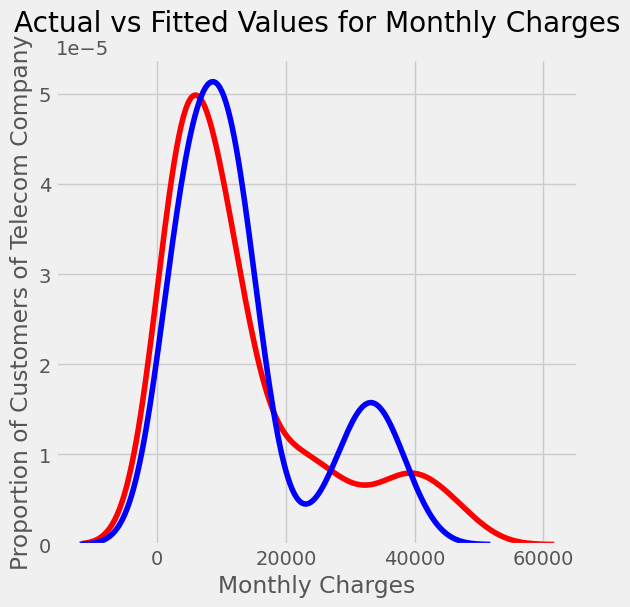

In [112]:
plt.figure(figsize=(6,6))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Proportion of Customers of Telecom Company')

plt.show()
plt.close()

In [113]:
#Decision Tree

In [114]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print('R-squared : ', dt.score(X_train,y_train))
r2 = dt.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-squared : ',adj_r2)
y_predict = dt.predict(X_test)
rscore=r2_score(y_test, y_predict)
print('R-squared on test data:', rscore)
mean_squared_error(y_test, y_predict)
print('RMSE : ', sqrt(mean_squared_error(y_test, y_predict)))

R-squared :  0.9984177040265554
Adjusted R-squared :  0.9984121128747058
R-squared on test data: 0.6482266154811969
RMSE :  7318.72492974447


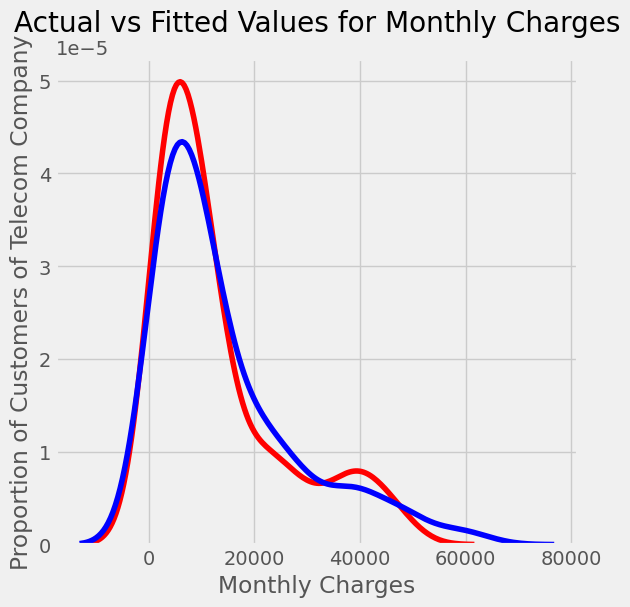

In [115]:
plt.figure(figsize=(6,6))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Proportion of Customers of Telecom Company')

plt.show()
plt.close()

In [116]:
#Random Forest

In [117]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print('R-squared : ', rf.score(X_train,y_train))
r2 = rf.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-squared : ',adj_r2)
y_predict = rf.predict(X_test)
rscore=r2_score(y_test, y_predict)
print('R-squared on test data:', rscore)
mean_squared_error(y_test, y_predict)
print('RMSE : ', sqrt(mean_squared_error(y_test, y_predict)))

R-squared :  0.9744886289925184
Adjusted R-squared :  0.9743984828052128
R-squared on test data: 0.8422449897538345
RMSE :  4901.122039339428


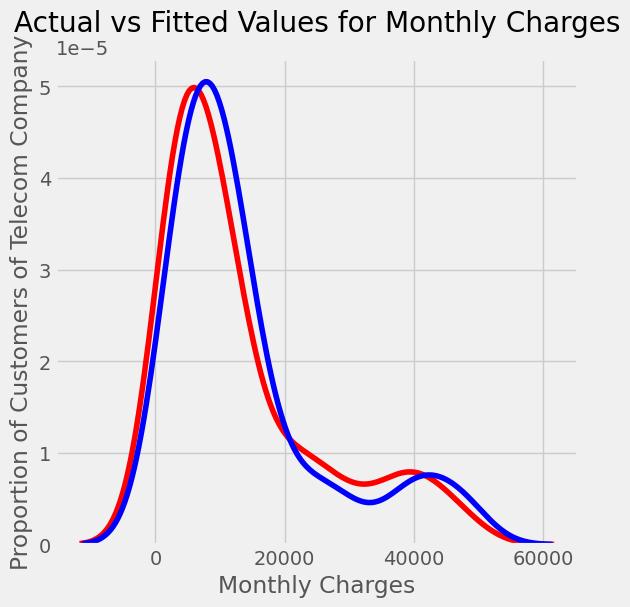

In [118]:
plt.figure(figsize=(6,6))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Proportion of Customers of Telecom Company')

plt.show()
plt.close()

In [119]:
#KNN

In [120]:
kn = KNeighborsRegressor(n_neighbors=11)
kn.fit(X_train,y_train)
print('R-squared : ', kn.score(X_train,y_train))
r2 = kn.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-squared : ',adj_r2)
y_predict = kn.predict(X_test)
rscore=r2_score(y_test, y_predict)
print('R-squared on test data:', rscore)
mean_squared_error(y_test, y_predict)
print('RMSE : ', sqrt(mean_squared_error(y_test, y_predict)))

R-squared :  0.8566349397116807
Adjusted R-squared :  0.8561283493926407
R-squared on test data: 0.8688736267071648
RMSE :  4468.368287535686


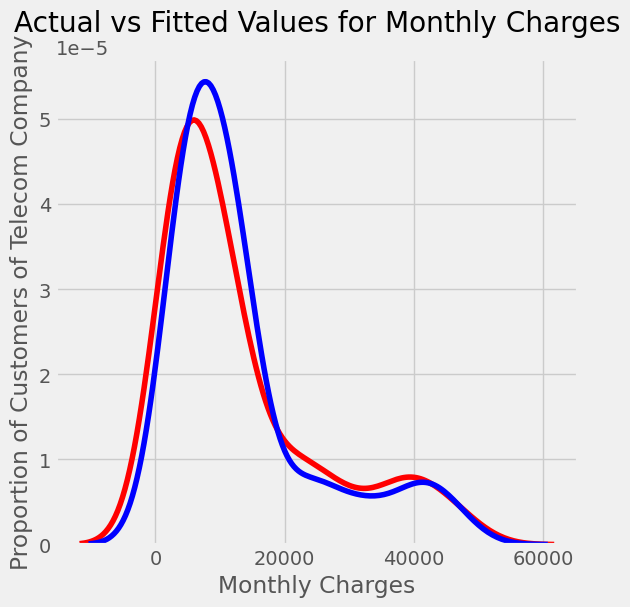

In [121]:
plt.figure(figsize=(6,6))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Proportion of Customers of Telecom Company')

plt.show()
plt.close()

In [122]:
#KNN with RandomSearchCV

In [123]:
# Define the parameter distribution for RandomizedSearch
param_dist = {
    'n_neighbors': np.arange(1, 20),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function
    'p': [1, 2]  # Power parameter for Minkowski distance
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Perform RandomizedSearch with cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Fit the best model to the entire training set
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
r_squared = best_model.score(X_train,y_train)
r2 = best_model.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rscore=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\t********* K-Neighbours Regressor *********")
print("\tR-squared            : ", r_squared)
print("\tAdjusted R-squared   : ", adj_r2)
print("\tTesting R-squared    : ", rscore)
print("\tRMSE                 : ", rmse)

	********* K-Neighbours Regressor *********
	R-squared            :  0.8530879955691145
	Adjusted R-squared   :  0.852568871878546
	Testing R-squared    :  0.8644185884666162
	RMSE                 :  4543.641019189408


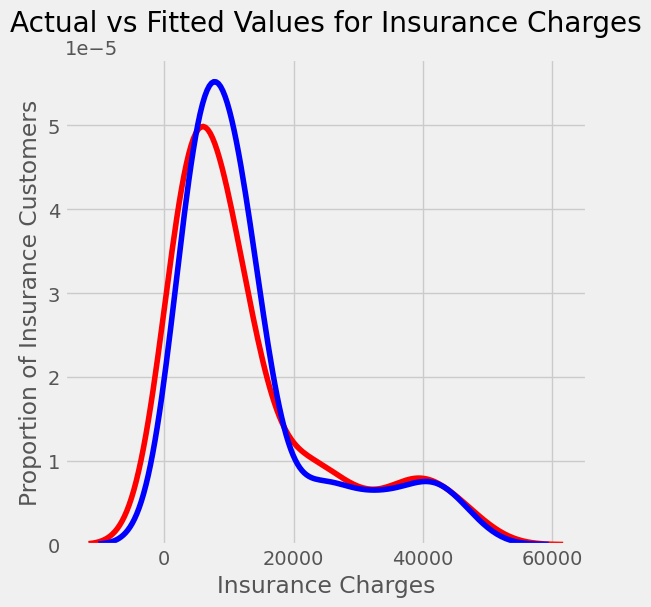

In [124]:
plt.figure(figsize=(6,6))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Insurance Charges')
plt.xlabel('Insurance Charges')
plt.ylabel('Proportion of Insurance Customers')

plt.show()
plt.close()

In [125]:
#Pickled Model

In [126]:
import pickle
import math

In [127]:
pickle.dump(best_model,open('best_model.pkl','wb'))

In [128]:
pickled_model = pickle.load(open('best_model.pkl','rb'))

In [129]:
Age = int(input("Age :"))
BMI = float(input("BMI :"))
Children = int(input("No. of Children :"))
Smoker = int(input("Smoking Status :"))
prediction = pickled_model.predict([[Age, BMI, Children, Smoker]])
prediction = math.ceil(prediction)
print("Customer will have Insurance Charges Rs.", prediction)

Age :42
BMI :28.880
No. of Children :1
Smoking Status :1
Customer will have Insurance Charges Rs. 16443
